In [1]:
!pip install seaborn

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [14]:
with open('../../timing_info/dask/four_gpu/vgg.json', 'r') as f:
    four_gpu = json.load(f)

In [15]:
four_gpu

[{'name': 'block1_conv1',
  'layer': 1,
  'run_time': 564.9414188861847,
  'rank': 'worker1',
  'replaced': True,
  'score': [0.6235640645027161, 0.8662999868392944]},
 {'name': 'block1_conv2',
  'layer': 2,
  'run_time': 902.4957082271576,
  'rank': 'worker',
  'replaced': True,
  'score': [0.6360206604003906, 0.8650000095367432]},
 {'name': 'block2_conv1',
  'layer': 4,
  'run_time': 408.57324743270874,
  'rank': 'worker',
  'replaced': True,
  'score': [0.6565162539482117, 0.8378999829292297]},
 {'name': 'block2_conv2',
  'layer': 5,
  'run_time': 578.7300221920013,
  'rank': 'worker1',
  'replaced': False,
  'score': [2.449300527572632, 0.10000000149011612]},
 {'name': 'block3_conv1',
  'layer': 7,
  'run_time': 260.423921585083,
  'rank': 'worker1',
  'replaced': False,
  'score': [2.4521284103393555, 0.10000000149011612]},
 {'name': 'block3_conv2',
  'layer': 8,
  'run_time': 320.4235100746155,
  'rank': 'worker',
  'replaced': False,
  'score': [2.4518179893493652, 0.10000000149

In [16]:
gpu_totals = {}

for layer in four_gpu[:-3:]:
    if layer['rank'] not in gpu_totals:
        gpu_totals[layer['rank']] = layer['run_time']
    else:
        gpu_totals[layer['rank']] += layer['run_time']

In [17]:
gpu_totals

{'worker1': 1904.1249182224274, 'worker': 2456.205693244934}

In [18]:
job_count = {}

for layer in four_gpu[:-3:]:
    if layer['rank'] not in job_count:
        job_count[layer['rank']] = 1
    else:
        job_count[layer['rank']] += 1

In [8]:
job_count

{'worker1': 2, 'worker3': 4, 'worker': 3, 'worker2': 4}

In [9]:
gpu_0 = [layer['run_time'] for layer in four_gpu[:-3:] if layer['rank'] == "worker"]

gpu_1 = [layer['run_time'] for layer in four_gpu[:-3:] if layer['rank'] == "worker1"]

gpu_2 = [layer['run_time'] for layer in four_gpu[:-3:] if layer['rank'] == "worker2"]

gpu_3 = [layer['run_time'] for layer in four_gpu[:-3:] if layer['rank'] == "worker3"]
print(gpu_0, np.cumsum(gpu_0))
print(gpu_1, np.cumsum(gpu_1))
print(gpu_2, np.cumsum(gpu_2))
print(gpu_3, np.cumsum(gpu_3))

[530.9945323467255, 164.45472645759583, 183.28443479537964] [530.99453235 695.4492588  878.7336936 ]
[564.365113735199, 992.3275337219238] [ 564.36511374 1556.69264746]
[252.91347289085388, 330.9246654510498, 206.12243175506592, 151.73862481117249] [252.91347289 583.83813834 789.9605701  941.69919491]
[430.489572763443, 319.60862493515015, 149.08176517486572, 148.94460320472717] [ 430.48957276  750.0981977   899.17996287 1048.12456608]


In [10]:
# add zeros for stacked bar
# chart
gpu_0.append(0)
gpu_1.append(0)
gpu_1.append(0)

print(gpu_0)
print(gpu_1)
print(gpu_2)
print(gpu_3)

[530.9945323467255, 164.45472645759583, 183.28443479537964, 0]
[564.365113735199, 992.3275337219238, 0, 0]
[252.91347289085388, 330.9246654510498, 206.12243175506592, 151.73862481117249]
[430.489572763443, 319.60862493515015, 149.08176517486572, 148.94460320472717]


In [11]:
task_0 = [gpu_0[0], gpu_1[0], gpu_2[0], gpu_3[0]]
task_1 = [gpu_0[1], gpu_1[1], gpu_2[1], gpu_3[1]]
task_2 = [gpu_0[2], gpu_1[2], gpu_2[2], gpu_3[2]]
task_3 = [gpu_0[3], gpu_1[3], gpu_2[3], gpu_3[3]]

r = [0, 1, 2, 3]
names = ['gpu_0', 'gpu_1', 'gpu_2', 'gpu_3']

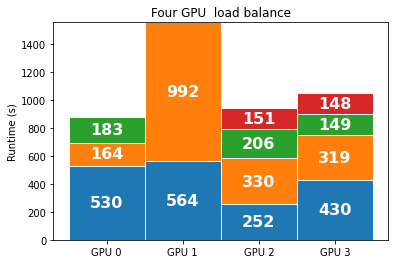

In [12]:
one_two = np.add(task_0, task_1).tolist()
all_three = np.add(one_two, task_2).tolist()
plt.xticks(np.arange(0, 4) , ["GPU 0" , "GPU 1", "GPU 2","GPU 3"])
ax1 = plt.bar(r, task_0, edgecolor='white', width=1)
ax2 = plt.bar(r, task_1, bottom=task_0, edgecolor='white', width=1)
ax3 = plt.bar(r, task_2, bottom=np.add(task_0, task_1).tolist(), edgecolor='white', width=1)
ax4 = plt.bar(r, task_3, bottom=all_three, edgecolor='white', width=1)
plt.ylabel("Runtime (s)")
plt.title("Four GPU  load balance")

for r1, r2, r3, r4 in zip(ax1, ax2, ax3, ax4):
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()
    h4 = r4.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%s" % (str(int(h1)) if h1 > 0 else ""), ha="center", va="center", color="white", fontsize=16, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%s" % (str(int(h2)) if h2 > 0 else ""), ha="center", va="center", color="white", fontsize=16, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 + h3 / 2., "%s" % (str(int(h3)) if h3 > 0 else ""), ha="center", va="center", color="white", fontsize=16, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 + h3 + h4 / 2., "%s" %  (str(int(h4)) if h4 > 0 else ""), ha="center", va="center", color="white", fontsize=16, fontweight="bold")
#plt.legend(['Task 0', 'Task 1', 'Task 2', 'Task 3'], loc='upper right', ncol=2, fancybox=True, shadow=True)
plt.savefig("../../Figures/four_GPU_vgg_bin_pack_number.png", dpi=200)

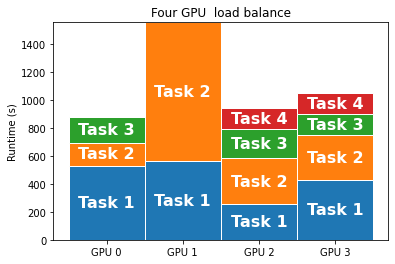

In [27]:
one_two = np.add(task_0, task_1).tolist()
all_three = np.add(one_two, task_2).tolist()
plt.xticks(np.arange(0, 4) , ["GPU 0" , "GPU 1", "GPU 2","GPU 3"])
ax1 = plt.bar(r, task_0, edgecolor='white', width=1)
ax2 = plt.bar(r, task_1, bottom=task_0, edgecolor='white', width=1)
ax3 = plt.bar(r, task_2, bottom=np.add(task_0, task_1).tolist(), edgecolor='white', width=1)
ax4 = plt.bar(r, task_3, bottom=all_three, edgecolor='white', width=1)
plt.ylabel("Runtime (s)")
plt.title("Four GPU  load balance")

for r1, r2, r3, r4 in zip(ax1, ax2, ax3, ax4):
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()
    h4 = r4.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%s" % ("Task 1" if h1 > 0 else ""), ha="center", va="center", color="white", fontsize=16, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%s" % ("Task 2" if h2 > 0 else ""), ha="center", va="center", color="white", fontsize=16, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 + h3 / 2., "%s" % ("Task 3" if h3 > 0 else ""), ha="center", va="center", color="white", fontsize=16, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 + h3 + h4 / 2., "%s" %  ("Task 4" if h4 > 0 else ""), ha="center", va="center", color="white", fontsize=16, fontweight="bold")
#plt.legend(['Task 0', 'Task 1', 'Task 2', 'Task 3'], loc='upper right', ncol=2, fancybox=True, shadow=True)
plt.savefig("../../Figures/four_GPU_vgg_bin_pack_task.png", dpi=200)

In [13]:
gpu_0 = [layer['run_time'] for layer in four_gpu[0:-3:4]]

gpu_1 = [layer['run_time'] for layer in four_gpu[1:-3:4] ]

gpu_2 = [layer['run_time'] for layer in four_gpu[2:-3:4] ]

gpu_3 = [layer['run_time'] for layer in four_gpu[3:-3:4]]
print(gpu_0, np.cumsum(gpu_0))
print(gpu_1, np.cumsum(gpu_1))
print(gpu_2, np.cumsum(gpu_2))
print(gpu_3, np.cumsum(gpu_3))

[564.365113735199, 252.91347289085388, 183.28443479537964, 151.73862481117249] [ 564.36511374  817.27858663 1000.56302142 1152.30164623]
[992.3275337219238, 319.60862493515015, 206.12243175506592] [ 992.32753372 1311.93615866 1518.05859041]
[430.489572763443, 330.9246654510498, 149.08176517486572] [430.48957276 761.41423821 910.49600339]
[530.9945323467255, 164.45472645759583, 148.94460320472717] [530.99453235 695.4492588  844.39386201]


In [29]:
# add zeros for stacked bar
# chart
gpu_1.append(0)
gpu_2.append(0)
gpu_3.append(0)

print(gpu_0)
print(gpu_1)
print(gpu_2)
print(gpu_3)

[564.365113735199, 252.91347289085388, 183.28443479537964, 151.73862481117249]
[992.3275337219238, 319.60862493515015, 206.12243175506592, 0]
[430.489572763443, 330.9246654510498, 149.08176517486572, 0]
[530.9945323467255, 164.45472645759583, 148.94460320472717, 0]


In [30]:
task_0 = [gpu_0[0], gpu_1[0], gpu_2[0], gpu_3[0]]
task_1 = [gpu_0[1], gpu_1[1], gpu_2[1], gpu_3[1]]
task_2 = [gpu_0[2], gpu_1[2], gpu_2[2], gpu_3[2]]
task_3 = [gpu_0[3], gpu_1[3], gpu_2[3], gpu_3[3]]

r = [0, 1, 2, 3]
names = ['gpu_0', 'gpu_1', 'gpu_2', 'gpu_3']

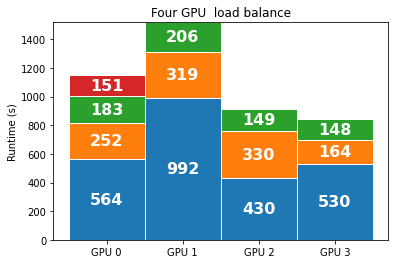

In [31]:
one_two = np.add(task_0, task_1).tolist()
all_three = np.add(one_two, task_2).tolist()
plt.xticks(np.arange(0, 4) , ["GPU 0" , "GPU 1", "GPU 2","GPU 3"])
ax1 = plt.bar(r, task_0, edgecolor='white', width=1)
ax2 = plt.bar(r, task_1, bottom=task_0, edgecolor='white', width=1)
ax3 = plt.bar(r, task_2, bottom=np.add(task_0, task_1).tolist(), edgecolor='white', width=1)
ax4 = plt.bar(r, task_3, bottom=all_three, edgecolor='white', width=1)
plt.ylabel("Runtime (s)")
plt.title("Four GPU  load balance")

for r1, r2, r3, r4 in zip(ax1, ax2, ax3, ax4):
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()
    h4 = r4.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%s" % (str(int(h1)) if h1 > 0 else ""), ha="center", va="center", color="white", fontsize=16, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%s" % (str(int(h2)) if h2 > 0 else ""), ha="center", va="center", color="white", fontsize=16, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 + h3 / 2., "%s" % (str(int(h3)) if h3 > 0 else ""), ha="center", va="center", color="white", fontsize=16, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 + h3 + h4 / 2., "%s" %  (str(int(h4)) if h4 > 0 else ""), ha="center", va="center", color="white", fontsize=16, fontweight="bold")
#plt.legend(['Task 0', 'Task 1', 'Task 2', 'Task 3'], loc='upper right', ncol=2, fancybox=True, shadow=True)
plt.savefig("../../Figures/four_GPU_vgg_bin_pack_number.png", dpi=200)